In [128]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# Імпортуємо одразу все, що нам знадобиться

In [129]:
pd.__version__

'2.1.4'

# Об'єднання даних кількох датасетів

### pd.concat

In [134]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

In [135]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

In [136]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [137]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [138]:
display(df1, df2, df3, df4)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [139]:
pd.concat([df1, df2])
# Він поєднує по індексу! Тобто, якщо індекси однакові, то вони будуть в одному рядку (якщо відсутні, то вони будуть просто поряд)
# працює як union в SQL
# Якщо відсутній стовпчик, то він буде просто доданий з NaN
#pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [140]:
pd.concat([df1, df4]) # увага на індекси!

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [141]:
pd.concat([df1, df4]).reset_index()

,index,A,B,C,D,F
0,0,A0,B0,C0,D0,NaN
1,1,A1,B1,C1,D1,NaN
2,2,A2,B2,C2,D2,NaN
3,3,A3,B3,C3,D3,NaN
4,2,NaN,B2,NaN,D2,F2
5,3,NaN,B3,NaN,D3,F3
6,6,NaN,B6,NaN,D6,F6
7,7,NaN,B7,NaN,D7,F7


In [142]:
pd.concat([df1, df4]).reset_index(drop=True) # видаляємо старі індекси

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [143]:
display(df1, df4, pd.concat([df1, df4]).reset_index(drop=True))

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [144]:
pd.concat([df1, df4], ignore_index=True) # аналогічно

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [145]:
pd.concat([df1, df3], axis=1) 
# поєднуємо по стовпчиках
# зазвичай, для цього краще використовувати merge

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,A9,B9,C9,D9
10,NaN,NaN,NaN,NaN,A10,B10,C10,D10
11,NaN,NaN,NaN,NaN,A11,B11,C11,D11


In [147]:
# як перевірити дані перед початком обєднання
pd.concat(
    [df1, df4],
    keys=["clients's data","df4"], # додаємо ключі для розрізнення даних 
    names=["Source", "client_id"], # додаємо імена для індексів
)

A   B    C   D    F
Source         client_id                       
clients's data 0           A0  B0   C0  D0  NaN
               1           A1  B1   C1  D1  NaN
               2           A2  B2   C2  D2  NaN
               3           A3  B3   C3  D3  NaN
df4            2          NaN  B2  NaN  D2   F2
               3          NaN  B3  NaN  D3   F3
               6          NaN  B6  NaN  D6   F6
               7          NaN  B7  NaN  D7   F7

### pd.merge

In [ ]:
left = pd.DataFrame(
    {
        "ID": ["1", "2", "3", "5", "9"],
        "Name": ["Alex", "Amy", "Allen", "Alice", "Ayoung"],
        "subject_id": ["apple", "orange", "banana", "strawberry", "raspberry"],
    }
)

right = pd.DataFrame(
    {
        "ID": ["1", "1", "3", "5"],
        "col_a": ["A0", "A1", "A2", "A3"],
        "col_b": ["B0", "B1", "B2", "B3"],
        "subject_id": ["apple", "orange", "banana", "kiwi"],
    }
)

display(left, right)

In [148]:
pd.merge(left, right)
# вона є аналоічною до join в SQL
# по замовчуванню використовується inner join
# використовується спільний стовпчик subject_id
# використовується спільний стовпчик ID
# документація https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

,ID,Name,subject_id,col_a,col_b
0,1,Alex,apple,A0,B0
1,3,Allen,banana,A2,B2


In [150]:
pd.merge(left, right, on=["ID"])  # вказуємо, по якому стовпчику ми хочемо зєднати

,ID,Name,subject_id_x,col_a,col_b,subject_id_y
0,1,Alex,apple,A0,B0,apple
1,1,Alex,apple,A1,B1,orange
2,3,Allen,banana,A2,B2,banana
3,5,Alice,strawberry,A3,B3,kiwi


In [151]:
pd.merge(
    left, right, on=["ID", "subject_id"]
)  # вказуємо кілька стовпчиків, по яким ми хочемо зєднати 

,ID,Name,subject_id,col_a,col_b
0,1,Alex,apple,A0,B0
1,3,Allen,banana,A2,B2


In [152]:
pd.merge(left, right, suffixes=("_l", "_r"), how="left", left_on="ID", right_on="ID") 
# вказуємо поля для лівої і правої таблиць окремо
# вказуємо cуфікси для стовпчиків, які збігаються

,ID,Name,subject_id_l,col_a,col_b,subject_id_r
0,1,Alex,apple,A0,B0,apple
1,1,Alex,apple,A1,B1,orange
2,2,Amy,orange,NaN,NaN,NaN
3,3,Allen,banana,A2,B2,banana
4,5,Alice,strawberry,A3,B3,kiwi
5,9,Ayoung,raspberry,NaN,NaN,NaN


In [153]:
pd.merge(left, right, suffixes=("_l", "_r"),
         left_index=True, 
         right_index=True, 
         how =  'left') # вказуємо, по якому стовпчику ми хочемо зєднати

# можна поєднати по індексу (left_index=True, right_index=True) і буде як concat 
# але в проді так не роблять!

,ID_l,Name,subject_id_l,ID_r,col_a,col_b,subject_id_r
0,1,Alex,apple,1,A0,B0,apple
1,2,Amy,orange,1,A1,B1,orange
2,3,Allen,banana,3,A2,B2,banana
3,5,Alice,strawberry,5,A3,B3,kiwi
4,9,Ayoung,raspberry,NaN,NaN,NaN,NaN


In [154]:
# додаємо тип з'єднання
pd.merge(left, right, on=["ID", "subject_id"], how="left")

,ID,Name,subject_id,col_a,col_b
0,1,Alex,apple,A0,B0
1,2,Amy,orange,NaN,NaN
2,3,Allen,banana,A2,B2
3,5,Alice,strawberry,NaN,NaN
4,9,Ayoung,raspberry,NaN,NaN


In [155]:
# додаємо тип з'єднання
pd.merge(left, right, on=["ID", "subject_id"], how="outer")

,ID,Name,subject_id,col_a,col_b
0,1,Alex,apple,A0,B0
1,2,Amy,orange,NaN,NaN
2,3,Allen,banana,A2,B2
3,5,Alice,strawberry,NaN,NaN
4,9,Ayoung,raspberry,NaN,NaN
5,1,NaN,orange,A1,B1
6,5,NaN,kiwi,A3,B3


In [156]:
pd.merge(left, right, on=["ID", "subject_id"], how="outer", indicator=True) # додаємо індикатор, який показує, звідки взялися дані
# Трішки бонуса, щоб спростити собі життя в майбутньому

,ID,Name,subject_id,col_a,col_b,_merge
0,1,Alex,apple,A0,B0,both
1,2,Amy,orange,NaN,NaN,left_only
2,3,Allen,banana,A2,B2,both
3,5,Alice,strawberry,NaN,NaN,left_only
4,9,Ayoung,raspberry,NaN,NaN,left_only
5,1,NaN,orange,A1,B1,right_only
6,5,NaN,kiwi,A3,B3,right_only


### pd.join

In [157]:
left.join(right, lsuffix="_l", rsuffix="_r")
# Метод dataFrame, a не функція pandas
# join робить те саме що і merge, але простенький 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

# join - це просто merge по індексу
# merge - це join по індексу або по стовпчику, або по кількох стовпчиках = any key, more flexible

,ID_l,Name,subject_id_l,ID_r,col_a,col_b,subject_id_r
0,1,Alex,apple,1,A0,B0,apple
1,2,Amy,orange,1,A1,B1,orange
2,3,Allen,banana,3,A2,B2,banana
3,5,Alice,strawberry,5,A3,B3,kiwi
4,9,Ayoung,raspberry,NaN,NaN,NaN,NaN


In [158]:
left.join(right,  how="inner", lsuffix="_l", rsuffix="_r")
# внутрішнє зєднання

,ID_l,Name,subject_id_l,ID_r,col_a,col_b,subject_id_r
0,1,Alex,apple,1,A0,B0,apple
1,2,Amy,orange,1,A1,B1,orange
2,3,Allen,banana,3,A2,B2,banana
3,5,Alice,strawberry,5,A3,B3,kiwi


# Зведені таблиці

In [159]:
df = pd.read_csv('survey_results_public.csv')
df.head(5)

#завантажимо вже знайомий датасет з опитування StackOverflow

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
# будувати зведені таблиці краще за все поступово: від простих до більш складних операцій
# > 100 MB Excel не відкриє, але pandas може працювати з файлами > 1 GB

# pivot_table(data, 
#             values = None, 
#             index = None, 
#             columns = None, 
#             aggfunc = 'mean', 
#             fill_value = None, 
#             margins = False, 
#             dropna = True, 
#             margins_name = 'All')

In [160]:
df.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [161]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [163]:
df.pivot_table(index="Industry", aggfunc="count").head(5)

,AIAcc,AIBen,AIDevHaveWorkedWith,AIDevWantToWorkWith,AINextNeither different nor similar,AINextSomewhat different,AINextSomewhat similar,AINextVery different,AINextVery similar,AISearchHaveWorkedWith,...,TechList,TimeAnswering,TimeSearching,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,WorkExp,YearsCode,YearsCodePro
Industry,,,,,,,,,,,,,,,,,,,,,
Advertising Services,396,588,272,200,62,246,78,140,31,512,...,544,781,781,712,631,659,577,779,782,748
Financial Services,1800,3157,1232,939,305,1120,287,598,121,2721,...,2662,4357,4370,4131,3695,3627,3148,4411,4413,4224
Healthcare,949,1570,697,527,154,586,154,315,64,1407,...,1525,2185,2194,2037,1814,1796,1551,2208,2209,2115
Higher Education,522,833,365,268,80,314,76,179,29,781,...,876,1219,1226,1086,983,914,786,1236,1234,1091
"Information Services, IT, Software Development, or other Technology",8106,13046,5633,4407,1374,4990,1380,2600,538,11636,...,11929,17945,17982,16946,15355,14716,12942,18078,18125,17279


In [165]:
#df.pivot_table(index="Industry")

In [166]:
# виведемо числові колонки
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [167]:
df[["Industry", "CompTotal", "WorkExp"]].pivot_table(index="Industry")

,CompTotal,WorkExp
Industry,,
Advertising Services,2.105130e+07,10.899872
Financial Services,2.510372e+07,11.237588
Healthcare,4.936683e+06,12.150362
Higher Education,1.149857e+06,12.975728
"Information Services, IT, Software Development, or other Technology",7.405357e+11,11.206937
Insurance,1.994461e+07,11.964489
Legal Services,8.955199e+06,11.159420
"Manufacturing, Transportation, or Supply Chain",2.302401e+07,11.987640
Oil & Gas,2.485602e+07,12.192727


In [170]:
df[["Industry", "CompTotal", "WorkExp"]].pivot_table(index="Industry", aggfunc="sum" )

,CompTotal,WorkExp
Industry,,
Advertising Services,1.294655e+10,8491.0
Financial Services,8.650742e+10,49569.0
Healthcare,8.412107e+09,26828.0
Higher Education,1.001526e+09,16038.0
"Information Services, IT, Software Development, or other Technology",1.000019e+16,202599.0
Insurance,1.152798e+10,8423.0
Legal Services,1.513429e+09,2310.0
"Manufacturing, Transportation, or Supply Chain",4.620919e+10,31036.0
Oil & Gas,5.194908e+09,3353.0


In [171]:
df[["Industry", 'Country', "CompTotal", "WorkExp"]].pivot_table(index=["Industry",'Country'], aggfunc="mean")

CompTotal  \
Industry             Country                                                            
Advertising Services Afghanistan                                                  NaN   
                     Albania                                                      NaN   
                     Algeria                                                      NaN   
                     Argentina                                           2.543333e+04   
                     Armenia                                             2.000000e+07   
...                                                                               ...   
Wholesale            United Arab Emirates                                9.200000e+04   
                     United Kingdom of Great Britain and Northern Ir...  5.150000e+04   
                     United States of America                            1.204665e+05   
                     Uruguay                                             4.620000e+04   
                     Viet Nam                                            1.235000e+09   

                                                                           WorkExp  
Industry             Country                                                        
Advertising Services Afghanistan                                         26.500000  
                     Albania                                              2.000000  
                     Algeria                                             21.000000  
                     Argentina                                            9.750000  
                     Armenia                                              6.000000  
...                                                                            ...  
Wholesale            United Arab Emirates                                 4.000000  
                     United Kingdom of Great Britain and Northern Ir...  12.833333  
                     United States of America                            15.764706  
                     Uruguay                                             26.000000  
                     Viet Nam                                             7.000000  

[1121 rows x 2 columns]

In [172]:
df[["Industry", "Country", "CompTotal", "WorkExp"]].pivot_table(
    index=["Industry", "Country"], aggfunc="mean"
).to_clipboard()

In [173]:
df[["Industry", "Country", "CompTotal", "WorkExp"]].pivot_table(
    index=["Industry", "Country"], aggfunc="median"
)

CompTotal  \
Industry             Country                                                            
Advertising Services Afghanistan                                                  NaN   
                     Albania                                                      NaN   
                     Algeria                                                      NaN   
                     Argentina                                           2.000000e+04   
                     Armenia                                             2.000000e+07   
...                                                                               ...   
Wholesale            United Arab Emirates                                9.200000e+04   
                     United Kingdom of Great Britain and Northern Ir...  6.500000e+04   
                     United States of America                            1.090000e+05   
                     Uruguay                                             4.620000e+04   
                     Viet Nam                                            1.235000e+09   

                                                                         WorkExp  
Industry             Country                                                      
Advertising Services Afghanistan                                            26.5  
                     Albania                                                 2.0  
                     Algeria                                                21.0  
                     Argentina                                               8.5  
                     Armenia                                                 6.0  
...                                                                          ...  
Wholesale            United Arab Emirates                                    4.0  
                     United Kingdom of Great Britain and Northern Ir...     13.0  
                     United States of America                               15.0  
                     Uruguay                                                26.0  
                     Viet Nam                                                7.0  

[1121 rows x 2 columns]

In [174]:
df[["Industry", "Country", "CompTotal", "WorkExp"]].pivot_table(
    index=["Industry", "Country"], aggfunc="sum"
)

CompTotal  \
Industry             Country                                                            
Advertising Services Afghanistan                                         0.000000e+00   
                     Albania                                             0.000000e+00   
                     Algeria                                             0.000000e+00   
                     Argentina                                           7.630000e+04   
                     Armenia                                             2.000000e+07   
...                                                                               ...   
Wholesale            United Arab Emirates                                1.840000e+05   
                     United Kingdom of Great Britain and Northern Ir...  2.575000e+05   
                     United States of America                            3.613996e+06   
                     Uruguay                                             4.620000e+04   
                     Viet Nam                                            1.235000e+09   

                                                                         WorkExp  
Industry             Country                                                      
Advertising Services Afghanistan                                            53.0  
                     Albania                                                 2.0  
                     Algeria                                                21.0  
                     Argentina                                              39.0  
                     Armenia                                                12.0  
...                                                                          ...  
Wholesale            United Arab Emirates                                    8.0  
                     United Kingdom of Great Britain and Northern Ir...     77.0  
                     United States of America                              536.0  
                     Uruguay                                                26.0  
                     Viet Nam                                                7.0  

[1127 rows x 2 columns]

In [177]:
df2 = df[["Industry", "Country", "CompTotal", "WorkExp"]]

In [178]:
df2.pivot_table(
    index=["Industry", "Country"], aggfunc=['mean', 'median']
)

mean  \
                                                                            CompTotal   
Industry             Country                                                            
Advertising Services Afghanistan                                                  NaN   
                     Albania                                                      NaN   
                     Algeria                                                      NaN   
                     Argentina                                           2.543333e+04   
                     Armenia                                             2.000000e+07   
...                                                                               ...   
Wholesale            United Arab Emirates                                9.200000e+04   
                     United Kingdom of Great Britain and Northern Ir...  5.150000e+04   
                     United States of America                            1.204665e+05   
                     Uruguay                                             4.620000e+04   
                     Viet Nam                                            1.235000e+09   

                                                                                    \
                                                                           WorkExp   
Industry             Country                                                         
Advertising Services Afghanistan                                         26.500000   
                     Albania                                              2.000000   
                     Algeria                                             21.000000   
                     Argentina                                            9.750000   
                     Armenia                                              6.000000   
...                                                                            ...   
Wholesale            United Arab Emirates                                 4.000000   
                     United Kingdom of Great Britain and Northern Ir...  12.833333   
                     United States of America                            15.764706   
                     Uruguay                                             26.000000   
                     Viet Nam                                             7.000000   

                                                                               median  \
                                                                            CompTotal   
Industry             Country                                                            
Advertising Services Afghanistan                                                  NaN   
                     Albania                                                      NaN   
                     Algeria                                                      NaN   
                     Argentina                                           2.000000e+04   
                     Armenia                                             2.000000e+07   
...                                                                               ...   
Wholesale            United Arab Emirates                                9.200000e+04   
                     United Kingdom of Great Britain and Northern Ir...  6.500000e+04   
                     United States of America                            1.090000e+05   
                     Uruguay                                             4.620000e+04   
                     Viet Nam                                            1.235000e+09   

                                                                                 
                                                                        WorkExp  
Industry             Country                                                     
Advertising Services Afghanistan                                           26.5  
                     Albania                          

In [179]:
df.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [183]:
df3 = df.pivot_table(
    index="Industry", values=["ConvertedCompYearly", "WorkExp"], aggfunc="mean"
).head(5)

In [184]:
df3.head(5)

,ConvertedCompYearly,WorkExp
Industry,,
Advertising Services,112730.652033,10.899872
Financial Services,123977.345539,11.237588
Healthcare,103571.103408,12.150362
Higher Education,72076.873126,12.975728
"Information Services, IT, Software Development, or other Technology",94924.338332,11.206937


In [185]:
mask = df["Country"].isin(["Ukraine", "Poland", "USA", "Germany", "France", "Canada", "Australia", 'Afghanistan'])

df[mask].pivot_table(
    index="Industry", values="ConvertedCompYearly", columns="Country", aggfunc="mean", fill_value=0
).head(5)

Country,Afghanistan,Australia,Canada,France,Germany,Poland,Ukraine
Industry,,,,,,,
Advertising Services,0.0,126872.285714,110890.551724,64574.888889,91818.750000,63312.869565,33807.666667
Financial Services,0.0,127312.336957,115690.544828,98275.422535,91857.378205,75000.732673,43689.958333
Healthcare,794.0,91614.021739,184987.211765,62941.345455,79663.903509,65884.177778,59288.000000
Higher Education,0.0,139937.956522,81898.000000,48287.633333,66849.553191,28392.333333,44271.000000
"Information Services, IT, Software Development, or other Technology",588.5,102846.423913,237403.632867,63104.969828,80239.737691,58646.770370,49447.906780


In [187]:
mask = df["Country"].isin(
    [
        "Ukraine",
        "Poland",
        "USA",
        "Germany",
        "France",
        "Canada",
        "Australia",
        "Afghanistan",
    ]
)
df[mask].pivot_table(
    index="Industry",
    values="ConvertedCompYearly",
    columns="Country",
    aggfunc="mean",  
    fill_value=0,
    margins=True, # додаємо рядок зі зведеними даними
)#.head(5)

Country,Afghanistan,Australia,Canada,France,Germany,Poland,Ukraine,All
Industry,,,,,,,,
Advertising Services,0.0,126872.285714,110890.551724,64574.888889,91818.750000,63312.869565,33807.666667,88197.770833
Financial Services,0.0,127312.336957,115690.544828,98275.422535,91857.378205,75000.732673,43689.958333,99183.027165
Healthcare,794.0,91614.021739,184987.211765,62941.345455,79663.903509,65884.177778,59288.000000,100427.258953
Higher Education,0.0,139937.956522,81898.000000,48287.633333,66849.553191,28392.333333,44271.000000,74456.664894
"Information Services, IT, Software Development, or other Technology",588.5,102846.423913,237403.632867,63104.969828,80239.737691,58646.770370,49447.906780,105330.540630
Insurance,0.0,106592.500000,91870.437500,58325.500000,75314.130435,37872.066667,38000.000000,73720.333333
Legal Services,478.0,68087.000000,150070.933333,70526.285714,74350.714286,65689.250000,44908.000000,96873.974359
"Manufacturing, Transportation, or Supply Chain",0.0,91597.029412,90737.385417,54156.716418,82322.959350,62437.513514,47216.142857,78738.679671
Oil & Gas,0.0,109259.900000,98499.434783,77104.666667,63679.363636,32949.857143,0.000000,83052.500000


In [188]:
# ключами що хочемо рахувати 
mask = df["Country"].isin(
    [
        "Ukraine",
        "Poland",
        "USA",
        "Germany",
        "France",
        "Canada",
        "Australia",
        "Afghanistan",
    ]
)
#table = 
df[mask].pivot_table(
    index="Industry",
    values=["ConvertedCompYearly", "WorkExp"],
    columns="Country",
    aggfunc={"ConvertedCompYearly": ["mean", "median"], "WorkExp": "mean"},
    fill_value=0,
).head(5)

ConvertedCompYearly  \
                                                                  mean   
Country                                                    Afghanistan   
Industry                                                                 
Advertising Services                                               0.0   
Financial Services                                                 0.0   
Healthcare                                                       794.0   
Higher Education                                                   0.0   
Information Services, IT, Software Development,...               588.5   

                                                                   \
                                                                    
Country                                                 Australia   
Industry                                                            
Advertising Services                                126872.285714   
Financial Services                                  127312.336957   
Healthcare                                           91614.021739   
Higher Education                                    139937.956522   
Information Services, IT, Software Development,...  102846.423913   

                                                                   \
                                                                    
Country                                                    Canada   
Industry                                                            
Advertising Services                                110890.551724   
Financial Services                                  115690.544828   
Healthcare                                          184987.211765   
Higher Education                                     81898.000000   
Information Services, IT, Software Development,...  237403.632867   

                                                                  \
                                                                   
Country                                                   France   
Industry                                                           
Advertising Services                                64574.888889   
Financial Services                                  98275.422535   
Healthcare                                          62941.345455   
Higher Education                                    48287.633333   
Information Services, IT, Software Development,...  63104.969828   

                                                                  \
                                                                   
Country                                                  Germany   
Industry                                                           
Advertising Services                                91818.750000   
Financial Services                                  91857.378205   
Healthcare                                          79663.903509   
Higher Education                                    66849.553191   
Information Services, IT, Software Development,...  80239.737691   

                                                                  \
                                                                   
Country                                                   Poland   
Industry                                                           
Advertising Services                                63312.869565   
Financial Services                                  75000.732673   
Healthcare                                          65884.177778   
Higher Education                                    28392.333333   
Information Services, IT, Software Development,...  58646.770370   

                                                                              \
                                                                      median   
Country                                                  Ukraine Afghanistan   
Industry                                                     

In [190]:
table = df[mask].pivot_table(
    index="Industry",
    values=["ConvertedCompYearly", "WorkExp"],
    columns="Country",
    aggfunc={"ConvertedCompYearly": ["mean", "median"], "WorkExp": "mean"},
    fill_value=0,
)

In [191]:
table.head(5)

ConvertedCompYearly  \
                                                                  mean   
Country                                                    Afghanistan   
Industry                                                                 
Advertising Services                                               0.0   
Financial Services                                                 0.0   
Healthcare                                                       794.0   
Higher Education                                                   0.0   
Information Services, IT, Software Development,...               588.5   

                                                                   \
                                                                    
Country                                                 Australia   
Industry                                                            
Advertising Services                                126872.285714   
Financial Services                                  127312.336957   
Healthcare                                           91614.021739   
Higher Education                                    139937.956522   
Information Services, IT, Software Development,...  102846.423913   

                                                                   \
                                                                    
Country                                                    Canada   
Industry                                                            
Advertising Services                                110890.551724   
Financial Services                                  115690.544828   
Healthcare                                          184987.211765   
Higher Education                                     81898.000000   
Information Services, IT, Software Development,...  237403.632867   

                                                                  \
                                                                   
Country                                                   France   
Industry                                                           
Advertising Services                                64574.888889   
Financial Services                                  98275.422535   
Healthcare                                          62941.345455   
Higher Education                                    48287.633333   
Information Services, IT, Software Development,...  63104.969828   

                                                                  \
                                                                   
Country                                                  Germany   
Industry                                                           
Advertising Services                                91818.750000   
Financial Services                                  91857.378205   
Healthcare                                          79663.903509   
Higher Education                                    66849.553191   
Information Services, IT, Software Development,...  80239.737691   

                                                                  \
                                                                   
Country                                                   Poland   
Industry                                                           
Advertising Services                                63312.869565   
Financial Services                                  75000.732673   
Healthcare                                          65884.177778   
Higher Education                                    28392.333333   
Information Services, IT, Software Development,...  58646.770370   

                                                                              \
                                                                      median   
Country                                                  Ukraine Afghanistan   
Industry                                                     

In [ ]:
columns = ["ConvertedCompYearly", "WorkExp"]

In [192]:
table.columns

MultiIndex([('ConvertedCompYearly',   'mean', 'Afghanistan'),
            ('ConvertedCompYearly',   'mean',   'Australia'),
            ('ConvertedCompYearly',   'mean',      'Canada'),
            ('ConvertedCompYearly',   'mean',      'France'),
            ('ConvertedCompYearly',   'mean',     'Germany'),
            ('ConvertedCompYearly',   'mean',      'Poland'),
            ('ConvertedCompYearly',   'mean',     'Ukraine'),
            ('ConvertedCompYearly', 'median', 'Afghanistan'),
            ('ConvertedCompYearly', 'median',   'Australia'),
            ('ConvertedCompYearly', 'median',      'Canada'),
            ('ConvertedCompYearly', 'median',      'France'),
            ('ConvertedCompYearly', 'median',     'Germany'),
            ('ConvertedCompYearly', 'median',      'Poland'),
            ('ConvertedCompYearly', 'median',     'Ukraine'),
            (            'WorkExp',   'mean', 'Afghanistan'),
            (            'WorkExp',   'mean',   'Australia'),
        

In [193]:
table.columns.to_flat_index() # перетворюємо в один рівень

Index([  ('ConvertedCompYearly', 'mean', 'Afghanistan'),
           ('ConvertedCompYearly', 'mean', 'Australia'),
              ('ConvertedCompYearly', 'mean', 'Canada'),
              ('ConvertedCompYearly', 'mean', 'France'),
             ('ConvertedCompYearly', 'mean', 'Germany'),
              ('ConvertedCompYearly', 'mean', 'Poland'),
             ('ConvertedCompYearly', 'mean', 'Ukraine'),
       ('ConvertedCompYearly', 'median', 'Afghanistan'),
         ('ConvertedCompYearly', 'median', 'Australia'),
            ('ConvertedCompYearly', 'median', 'Canada'),
            ('ConvertedCompYearly', 'median', 'France'),
           ('ConvertedCompYearly', 'median', 'Germany'),
            ('ConvertedCompYearly', 'median', 'Poland'),
           ('ConvertedCompYearly', 'median', 'Ukraine'),
                     ('WorkExp', 'mean', 'Afghanistan'),
                       ('WorkExp', 'mean', 'Australia'),
                          ('WorkExp', 'mean', 'Canada'),
                          ('Wor

In [194]:
columns = ["_".join(col).strip() for col in table.columns.to_flat_index()]
columns

['ConvertedCompYearly_mean_Afghanistan',
 'ConvertedCompYearly_mean_Australia',
 'ConvertedCompYearly_mean_Canada',
 'ConvertedCompYearly_mean_France',
 'ConvertedCompYearly_mean_Germany',
 'ConvertedCompYearly_mean_Poland',
 'ConvertedCompYearly_mean_Ukraine',
 'ConvertedCompYearly_median_Afghanistan',
 'ConvertedCompYearly_median_Australia',
 'ConvertedCompYearly_median_Canada',
 'ConvertedCompYearly_median_France',
 'ConvertedCompYearly_median_Germany',
 'ConvertedCompYearly_median_Poland',
 'ConvertedCompYearly_median_Ukraine',
 'WorkExp_mean_Afghanistan',
 'WorkExp_mean_Australia',
 'WorkExp_mean_Canada',
 'WorkExp_mean_France',
 'WorkExp_mean_Germany',
 'WorkExp_mean_Poland',
 'WorkExp_mean_Ukraine']

In [195]:
table.columns = columns

In [196]:
table.head(5)

,ConvertedCompYearly_mean_Afghanistan,ConvertedCompYearly_mean_Australia,ConvertedCompYearly_mean_Canada,ConvertedCompYearly_mean_France,ConvertedCompYearly_mean_Germany,ConvertedCompYearly_mean_Poland,ConvertedCompYearly_mean_Ukraine,ConvertedCompYearly_median_Afghanistan,ConvertedCompYearly_median_Australia,ConvertedCompYearly_median_Canada,...,ConvertedCompYearly_median_Germany,ConvertedCompYearly_median_Poland,ConvertedCompYearly_median_Ukraine,WorkExp_mean_Afghanistan,WorkExp_mean_Australia,WorkExp_mean_Canada,WorkExp_mean_France,WorkExp_mean_Germany,WorkExp_mean_Poland,WorkExp_mean_Ukraine
Industry,,,,,,,,,,,,,,,,,,,,,
Advertising Services,0.0,126872.285714,110890.551724,64574.888889,91818.750000,63312.869565,33807.666667,0.0,114029.0,104092.0,...,69608.0,57423.0,27118.0,26.5,13.733333,11.235294,10.838710,10.846154,9.666667,10.000000
Financial Services,0.0,127312.336957,115690.544828,98275.422535,91857.378205,75000.732673,43689.958333,0.0,112377.0,96657.0,...,83423.0,71779.0,41206.5,0.0,13.281818,12.329609,11.465116,11.435484,9.788321,9.000000
Healthcare,794.0,91614.021739,184987.211765,62941.345455,79663.903509,65884.177778,59288.000000,794.0,91223.0,92939.0,...,76033.5,51853.0,54000.0,27.0,13.714286,13.910891,9.304348,11.439189,11.142857,8.166667
Higher Education,0.0,139937.956522,81898.000000,48287.633333,66849.553191,28392.333333,44271.000000,0.0,74036.0,72492.5,...,63430.0,23926.0,54237.0,0.0,13.892857,15.213115,10.944444,10.330769,15.666667,13.333333
"Information Services, IT, Software Development, or other Technology",588.5,102846.423913,237403.632867,63104.969828,80239.737691,58646.770370,49447.906780,588.5,99156.0,96657.0,...,73892.0,55030.0,44275.0,7.5,14.967836,12.897778,10.724382,11.500000,9.425494,10.603175


In [197]:
dfp = df.pivot_table(
    index="Industry", columns="RemoteWork", values="ConvertedCompYearly", aggfunc="mean"
)

In [198]:
dfp.head(5)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.818182,92037.163934,118059.633540
Financial Services,141774.783699,90478.501362,113122.255074
Healthcare,90572.272590,69786.770115,120466.587486
Higher Education,71734.458015,54624.260870,86431.578947
"Information Services, IT, Software Development, or other Technology",97853.381956,58725.490110,103088.492116


<Axes: xlabel='RemoteWork', ylabel='Industry'>

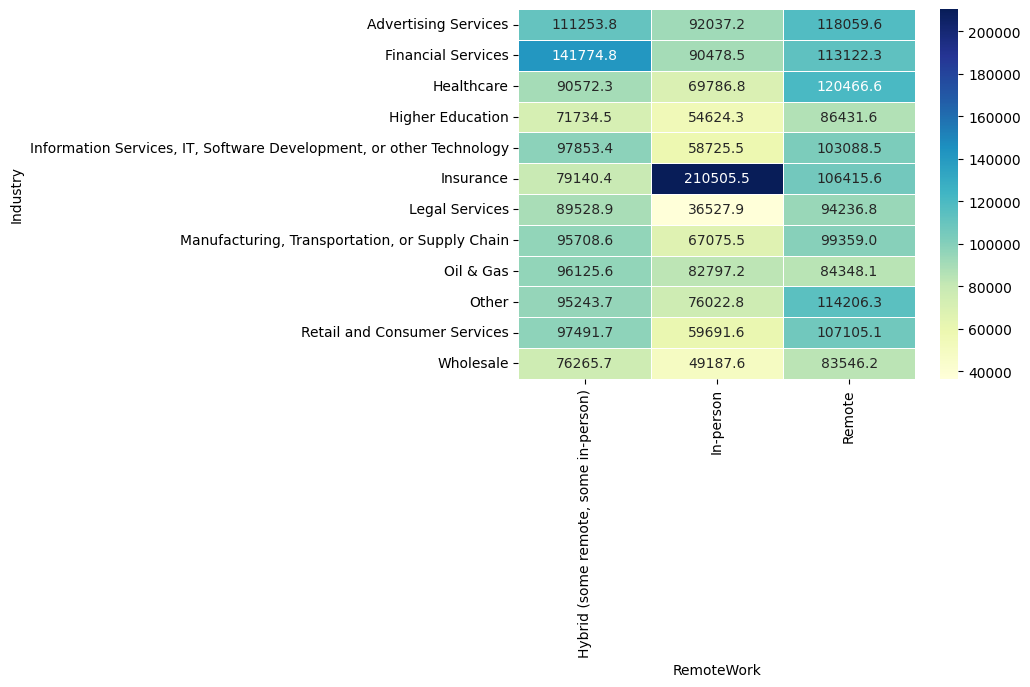

In [201]:

sns.heatmap(dfp, annot=True, fmt=".1f", linewidths=0.5, cmap="YlGnBu")

# Lambda - функції та метод apply()

In [202]:
dfp["Remote"]

# якщо ми використовуємо агрегацію mean, то за замовчуванням ми отримуємо не округлені числа з dtype: float64
# що ми можемо зробити інакше, якщо нам треба, наприклад, експортувати дані з 2 знаками після коми?

Industry
Advertising Services                                                   118059.633540
Financial Services                                                     113122.255074
Healthcare                                                             120466.587486
Higher Education                                                        86431.578947
Information Services, IT, Software Development, or other Technology    103088.492116
Insurance                                                              106415.603053
Legal Services                                                          94236.813187
Manufacturing, Transportation, or Supply Chain                          99358.951220
Oil & Gas                                                               84348.084507
Other                                                                  114206.274415
Retail and Consumer Services                                           107105.090418
Wholesale                                               

In [207]:
dfp = df.pivot_table(
    index="Industry", columns="RemoteWork", values="ConvertedCompYearly", aggfunc=np.mean
)

/var/folders/1_/srzbzbl92_g30dskrrsvt1d80000gn/T/ipykernel_64259/1853443059.py:1: FutureWarning: The provided callable <function mean at 0x105dd3d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dfp = df.pivot_table(


In [208]:
dfp

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.818182,92037.163934,118059.633540
Financial Services,141774.783699,90478.501362,113122.255074
Healthcare,90572.272590,69786.770115,120466.587486
Higher Education,71734.458015,54624.260870,86431.578947
"Information Services, IT, Software Development, or other Technology",97853.381956,58725.490110,103088.492116
Insurance,79140.384615,210505.461538,106415.603053
Legal Services,89528.939394,36527.916667,94236.813187
"Manufacturing, Transportation, or Supply Chain",95708.629319,67075.538298,99358.951220
Oil & Gas,96125.627660,82797.195122,84348.084507


In [209]:
# dfp = df.pivot_table(
#      index="Industry", columns="RemoteWork", values="ConvertedCompYearly", aggfunc=np.round(np.mean,2)
#  )


# # і ми не можемо використати як аргумент одразу кілька функцій

In [ ]:
def round_mean(x):
    return np.round(np.mean(x), 2)  # округлюємо до 2 знаків після коми

In [210]:
dfp = df.pivot_table(
    index="Industry",
    columns="RemoteWork",
    values="ConvertedCompYearly",
    aggfunc=round_mean,
)

In [212]:
dfp.head(5)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49


In [213]:
lambda_round_mean = lambda x: np.round(np.mean(x), 2)  # округлюємо до 2 знаків після коми

In [214]:
dfp = df.pivot_table(
    index="Industry",
    columns="RemoteWork",
    values="ConvertedCompYearly",
    aggfunc=lambda_round_mean,
)

# ми можемо використати lambda-функцію за спрощеним синтаксисом

In [215]:
dfp = df.pivot_table(
    index="Industry",
    columns="RemoteWork",
    values="ConvertedCompYearly",
    aggfunc=lambda x: np.round(np.mean(x), 2),
)

dfp.head(5)

# але вона нам треба тільки один раз, тому ми можемо використати анонімну функцію вказавши прямо на місці значення відповідного аргументу

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49


In [ ]:
# А що робити якщо ми маэмо вже створену не округлену таблицю?

In [216]:
dfp = df.pivot_table(
    index="Industry",
    columns="RemoteWork",
    values="ConvertedCompYearly",
    aggfunc='mean',
)

dfp.head(5)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.818182,92037.163934,118059.633540
Financial Services,141774.783699,90478.501362,113122.255074
Healthcare,90572.272590,69786.770115,120466.587486
Higher Education,71734.458015,54624.260870,86431.578947
"Information Services, IT, Software Development, or other Technology",97853.381956,58725.490110,103088.492116


In [217]:
dfp['Remote'].apply(lambda x: np.round(x, 2))

Industry
Advertising Services                                                   118059.63
Financial Services                                                     113122.26
Healthcare                                                             120466.59
Higher Education                                                        86431.58
Information Services, IT, Software Development, or other Technology    103088.49
Insurance                                                              106415.60
Legal Services                                                          94236.81
Manufacturing, Transportation, or Supply Chain                          99358.95
Oil & Gas                                                               84348.08
Other                                                                  114206.27
Retail and Consumer Services                                           107105.09
Wholesale                                                               83546.17
Name: Remote, dtype

In [218]:
dfp[['Hybrid (some remote, some in-person)','In-person','Remote']].apply(lambda x: np.round(x, 2)).head(5)

# застосувати до декількох конкретиних стовпчиків

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49


In [219]:
dfp[["Hybrid (some remote, some in-person)", "In-person", "Remote"]].apply(lambda x: np.round(x, 2))

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49
Insurance,79140.38,210505.46,106415.60
Legal Services,89528.94,36527.92,94236.81
"Manufacturing, Transportation, or Supply Chain",95708.63,67075.54,99358.95
Oil & Gas,96125.63,82797.20,84348.08


# Робота з датами та часом

https://github.com/devua/csv/tree/master/salaries
Зимове опитування обіцяють надати тільки в понеділок((  https://dou.ua/lenta/sitenews/winter-survey-2023/ 

In [220]:
df = pd.read_csv('2023_june_raw.csv', sep = ';')
df.head(5)

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
0,5.26.2023 13:40:35,Працюю full-time в ІТ-компанії чи ІТ-відділі,2300,"Marketing, PR, SEO, Copywriter",Senior,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,до 200,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,28
1,5.26.2023 13:40:36,Працюю full-time в ІТ-компанії чи ІТ-відділі,3450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутсорсингова,понад 1000,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,28
2,5.26.2023 13:41:02,Працюю full-time в ІТ-компанії чи ІТ-відділі,900,"Marketing, PR, SEO, Copywriter",Team Lead,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Продуктова,до 200,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Миколаїв чи область,Жінка,27
3,5.26.2023 13:41:19,Працюю full-time в ІТ-компанії чи ІТ-відділі,4000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,понад 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,27
4,5.26.2023 13:41:34,Працюю full-time в ІТ-компанії чи ІТ-відділі,2700,"Analyst (Business, Data, System etc)",Middle,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Продуктова,до 1000,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,27


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 31 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Timestamp                                                                   14059 non-null  object
 1   Ваша основна зайнятість в ІТ зараз...                                       14059 non-null  object
 2   Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків         13970 non-null  object
 3   Спеціалізація                                                               13985 non-null  object
 4   Ваш тайтл на цій посаді                                                     13985 non-null  object
 5   Вкажіть вашу спеціалізацію Game Design                                      68 non-null     object
 6   Вкажіть вашу спеціалізацію Sound                      

In [226]:
df["Timestamp"]

# поле з датою, за замовчуванням, має тип "object"

0       2023-05-26 13:40:35
1       2023-05-26 13:40:36
2       2023-05-26 13:41:02
3       2023-05-26 13:41:19
4       2023-05-26 13:41:34
                ...        
14054   2023-06-26 13:27:47
14055   2023-06-26 13:28:38
14056   2023-06-26 13:42:22
14057   2023-06-26 13:48:00
14058   2023-06-26 13:53:18
Name: Timestamp, Length: 14059, dtype: datetime64[ns]

In [224]:
# df["Timestamp"].dt.day_name()

# на поле такого типу ми не можемо застосувати методи, які доступні для типу "datetime"

In [225]:
# ми можемо конвертувати поле в тип "datetime" за допомогою методу to_datetime

df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [228]:
df["Timestamp"].dt.day_of_year

0        146
1        146
2        146
3        146
4        146
        ... 
14054    177
14055    177
14056    177
14057    177
14058    177
Name: Timestamp, Length: 14059, dtype: int32

In [233]:
# також можна вказати поля з датами і часом при читанні файлу

df = pd.read_csv('2023_june_raw.csv', sep = ';', parse_dates=['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 31 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   Timestamp                                                                   14059 non-null  datetime64[ns]
 1   Ваша основна зайнятість в ІТ зараз...                                       14059 non-null  object        
 2   Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків         13970 non-null  object        
 3   Спеціалізація                                                               13985 non-null  object        
 4   Ваш тайтл на цій посаді                                                     13985 non-null  object        
 5   Вкажіть вашу спеціалізацію Game Design                                      68 non-null     object    

In [229]:
df['Timestamp'].dt.day_name()

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
14054    Monday
14055    Monday
14056    Monday
14057    Monday
14058    Monday
Name: Timestamp, Length: 14059, dtype: object

In [230]:
df["Timestamp"].dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
14054    2023
14055    2023
14056    2023
14057    2023
14058    2023
Name: Timestamp, Length: 14059, dtype: int32

In [231]:
df["Timestamp"].dt.days_in_month

0        31
1        31
2        31
3        31
4        31
         ..
14054    30
14055    30
14056    30
14057    30
14058    30
Name: Timestamp, Length: 14059, dtype: int32

In [234]:
# перевіримо коли відбулося перше та останне заповнення опитування

print(df["Timestamp"].min())
print(df["Timestamp"].max())

2023-05-26 13:40:35
2023-06-26 13:53:18


In [235]:
df_filter = (df["Timestamp"] >= pd.to_datetime("2023-06-01")) & (df["Timestamp"] <= pd.to_datetime("2023-06-16"))
df.loc[df_filter].head(2)

# відфільтруємо лише тих, хто заповнив опитування в першій половині червня 2023 року

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
5313,2023-06-01 00:00:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,25000,"СTO, Director of Engineering, Program Director...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,Dating,Продуктова,до 200,10,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,33
5314,2023-06-01 00:00:15,Працюю full-time в ІТ-компанії чи ІТ-відділі,5500,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,понад 1000,6,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,"За кордоном (переїхали через війну, але планую...",NaN,Жінка,24


In [237]:
df_filter = (df["Timestamp"] >= "2023-06-01") & (
    df["Timestamp"] <= "2023-06-16"
)
df.loc[df_filter].head(2)

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
5313,2023-06-01 00:00:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,25000,"СTO, Director of Engineering, Program Director...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,Dating,Продуктова,до 200,10,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,33
5314,2023-06-01 00:00:15,Працюю full-time в ІТ-компанії чи ІТ-відділі,5500,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,понад 1000,6,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,"За кордоном (переїхали через війну, але планую...",NaN,Жінка,24


In [238]:
df.index

RangeIndex(start=0, stop=14059, step=1)

In [239]:
df = df.set_index("Timestamp")
df.head(5)

# Дату та час можна використовувати як індекс

,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",Ваша посада Marketing,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-05-26 13:40:35,Працюю full-time в ІТ-компанії чи ІТ-відділі,2300,"Marketing, PR, SEO, Copywriter",Senior,NaN,NaN,NaN,NaN,NaN,Digital Marketing Manager,...,Інша,Аутсорсингова,до 200,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,28
2023-05-26 13:40:36,Працюю full-time в ІТ-компанії чи ІТ-відділі,3450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутсорсингова,понад 1000,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,28
2023-05-26 13:41:02,Працюю full-time в ІТ-компанії чи ІТ-відділі,900,"Marketing, PR, SEO, Copywriter",Team Lead,NaN,NaN,NaN,NaN,NaN,Digital Marketing Manager,...,E-commerce,Продуктова,до 200,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Миколаїв чи область,Жінка,27
2023-05-26 13:41:19,Працюю full-time в ІТ-компанії чи ІТ-відділі,4000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,понад 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,27
2023-05-26 13:41:34,Працюю full-time в ІТ-компанії чи ІТ-відділі,2700,"Analyst (Business, Data, System etc)",Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Продуктова,до 1000,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,27


In [240]:
# тепер ми можемо фільтрувати за частковим співпадінням значень індексу

df.loc["2023-06"].head(5)

,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",Ваша посада Marketing,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,25000,"СTO, Director of Engineering, Program Director...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,NaN,...,Dating,Продуктова,до 200,10,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,33
2023-06-01 00:00:15,Працюю full-time в ІТ-компанії чи ІТ-відділі,5500,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,понад 1000,6,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,"За кордоном (переїхали через війну, але планую...",NaN,Жінка,24
2023-06-01 00:02:48,Працюю full-time в ІТ-компанії чи ІТ-відділі,4500,Software Engineer,Tech Lead,NaN,NaN,NaN,NaN,NaN,NaN,...,"E-commerce, Fintech / Banking / Capital Manage...",Аутсорсингова,до 200,8,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,32
2023-06-01 00:03:29,Втратив(-ла) роботу в ІТ і шукаю нову,6000,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Інша,Продуктова,до 50,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Івано-Франківськ чи область,Чоловік,32
2023-06-01 00:03:32,Працюю full-time в ІТ-компанії чи ІТ-відділі,1450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Edtech / Education,Аутсорсингова,до 200,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Одеса чи область,Чоловік,37


In [241]:
df.loc["2023-06-07"].head(5)

,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",Ваша посада Marketing,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-07 00:02:18,Працюю full-time в ІТ-компанії чи ІТ-відділі,400,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Junior,NaN,NaN,Manual QA,NaN,NaN,NaN,...,E-commerce,Аутсорсингова,до 50,"0,25",Ще студент вишу,Intermediate,В Україні,Луцьк чи Волинська область,Чоловік,18
2023-06-07 00:26:05,Працюю full-time в ІТ-компанії чи ІТ-відділі,1750,"Analyst (Business, Data, System etc)",Junior,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутсорсингова,понад 1000,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Львів чи область,Чоловік,33
2023-06-07 00:28:07,Працюю full-time в ІТ-компанії чи ІТ-відділі,2000,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Middle,NaN,NaN,Manual QA,NaN,NaN,NaN,...,E-commerce,Аутсорсингова,до 200,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Intermediate,В Україні,Львів чи область,Жінка,32
2023-06-07 00:49:05,Працюю full-time в ІТ-компанії чи ІТ-відділі,350,Software Engineer,Intern/Trainee,NaN,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутстафінгова,до 10 спеціалістів,"0,25","Вища (бакалавр, спеціаліст, магістр) - одна аб...",Intermediate,В Україні,Київ чи область,Чоловік,23
2023-06-07 01:06:23,Працюю full-time в ІТ-компанії чи ІТ-відділі,900,"Analyst (Business, Data, System etc)",Intern/Trainee,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутстафінгова,до 1000,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,29


In [242]:
print(df.index)

DatetimeIndex(['2023-05-26 13:40:35', '2023-05-26 13:40:36',
               '2023-05-26 13:41:02', '2023-05-26 13:41:19',
               '2023-05-26 13:41:34', '2023-05-26 13:42:00',
               '2023-05-26 13:42:16', '2023-05-26 13:42:24',
               '2023-05-26 13:42:32', '2023-05-26 13:42:42',
               ...
               '2023-06-26 12:52:47', '2023-06-26 12:59:41',
               '2023-06-26 13:10:47', '2023-06-26 13:12:29',
               '2023-06-26 13:26:37', '2023-06-26 13:27:47',
               '2023-06-26 13:28:38', '2023-06-26 13:42:22',
               '2023-06-26 13:48:00', '2023-06-26 13:53:18'],
              dtype='datetime64[ns]', name='Timestamp', length=14059, freq=None)


In [243]:
# також можемо робити слайси по індексу

df.loc[pd.to_datetime("2023-05-26 13:40:35"):pd.to_datetime("2023-05-26 13:42:24")]

,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",Ваша посада Marketing,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-05-26 13:40:35,Працюю full-time в ІТ-компанії чи ІТ-відділі,2300,"Marketing, PR, SEO, Copywriter",Senior,NaN,NaN,NaN,NaN,NaN,Digital Marketing Manager,...,Інша,Аутсорсингова,до 200,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,28
2023-05-26 13:40:36,Працюю full-time в ІТ-компанії чи ІТ-відділі,3450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутсорсингова,понад 1000,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,28
2023-05-26 13:41:02,Працюю full-time в ІТ-компанії чи ІТ-відділі,900,"Marketing, PR, SEO, Copywriter",Team Lead,NaN,NaN,NaN,NaN,NaN,Digital Marketing Manager,...,E-commerce,Продуктова,до 200,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Миколаїв чи область,Жінка,27
2023-05-26 13:41:19,Працюю full-time в ІТ-компанії чи ІТ-відділі,4000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,понад 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,27
2023-05-26 13:41:34,Працюю full-time в ІТ-компанії чи ІТ-відділі,2700,"Analyst (Business, Data, System etc)",Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Продуктова,до 1000,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,27
2023-05-26 13:42:00,Втратив(-ла) роботу в ІТ і шукаю нову,1200,Project/Product/Program/Delivery/Engineering M...,Junior,NaN,NaN,NaN,NaN,NaN,NaN,...,Gambling,Аутсорсингова,до 200,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Львів чи область,Чоловік,25
2023-05-26 13:42:16,Працюю full-time в ІТ-компанії чи ІТ-відділі,1150,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Team Lead,NaN,NaN,Automation QA,NaN,NaN,NaN,...,E-commerce,Продуктова,до 1000,1,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Intermediate,В Україні,Львів чи область,Чоловік,25
2023-05-26 13:42:24,Працюю full-time в ІТ-компанії чи ІТ-відділі,4170,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Telecom,Аутстафінгова,до 200,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Львів чи область,Чоловік,28


In [246]:
# змінити кому на крапку в розділенні дробної частини
salaries = df["Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків"].apply(lambda x: str(x).replace(",", ".")).astype(float)

In [247]:
salaries

Timestamp
2023-05-26 13:40:35    2300.0
2023-05-26 13:40:36    3450.0
2023-05-26 13:41:02     900.0
2023-05-26 13:41:19    4000.0
2023-05-26 13:41:34    2700.0
                        ...  
2023-06-26 13:27:47    1850.0
2023-06-26 13:28:38     700.0
2023-06-26 13:42:22    3000.0
2023-06-26 13:48:00    3000.0
2023-06-26 13:53:18    5000.0
Name: Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків, Length: 14059, dtype: float64

In [252]:
salaries.resample("M", label="right").median().astype(int)

# і подивимося середню зарплату за тижнем заповнення опитування
# для цього згрупуємо дані по тижнях за допомогою методу resample()

# label - вказуємо, що ми хочемо використовувати праву межу інтервалу як мітку для групи ()

Timestamp
2023-05-31    2900
2023-06-30    2500
Freq: M, Name: Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків, dtype: int64